In [1]:
import numpy as np
from sklearn.svm import SVC
svc=SVC(probability=True, kernel='linear')
import pandas as pd
import matplotlib.pyplot as pyplot
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
%matplotlib inline

In [2]:
#Reading In The Data
df = pd.read_table("../data/australian.csv", sep='\s+', header=None)

#15th colums is class attribute

y = df[14]
X = df.drop(columns = 14)
y.value_counts()

0    383
1    307
Name: 14, dtype: int64

In [3]:
# Split features and target into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y, test_size = 0.8)

In [5]:
#Training with base classifier as svm
adaB = AdaBoostClassifier(random_state=1, base_estimator=svc)
adaB.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                      class_weight=None, coef0=0.0,
                                      decision_function_shape='ovr', degree=3,
                                      gamma='scale', kernel='linear',
                                      max_iter=-1, probability=True,
                                      random_state=None, shrinking=True,
                                      tol=0.001, verbose=False),
                   learning_rate=1.0, n_estimators=50, random_state=1)

              precision    recall  f1-score   support

           0       0.59      0.99      0.74       306
           1       0.93      0.15      0.26       246

    accuracy                           0.62       552
   macro avg       0.76      0.57      0.50       552
weighted avg       0.74      0.62      0.53       552

RandF: ROC AUC=0.886


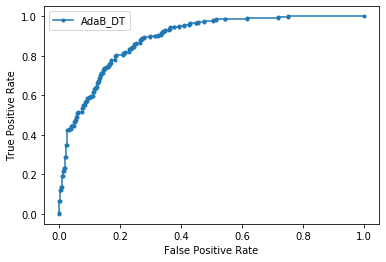

In [6]:
# Make predictions for the test set
y_pred_test = adaB.predict(X_test)


# View accuracy score
accuracy_score(y_test, y_pred_test, normalize=True)
print(classification_report(y_test, y_pred_test))

adaB_probs = adaB.predict_proba(X_test)
# keep probabilities for the positive outcome only
adaB_probs = adaB_probs[:, 1]
# calculate scores
adaB_auc = roc_auc_score(y_test, adaB_probs)
# summarize scores
print('RandF: ROC AUC=%.3f' % (adaB_auc))
# calculate roc curves
adaB_fpr, adaB_tpr, _ = roc_curve(y_test, adaB_probs)

# plot the roc curve for the model
pyplot.plot(adaB_fpr, adaB_tpr, marker='.', label='AdaB_DT')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()